In [1]:
## Small earthquake

In [2]:
import os

from synthacc.io.axisem import read_ground_model
from synthacc.recordings import plot_recordings
from synthacc.source.mechanism import FocalMechanism
from synthacc.source.moment import mw_to_m0
from synthacc.io import qseis

In [3]:
root_folder = %pwd

ground_model = read_ground_model(os.path.join(root_folder, 'data', 'ak135f.txt'), max_depth=100000)
gmt = 'dis'
duration = 51.2

src = (0, 0, 20000)
rcv = (20000, 0, 0)
fm = FocalMechanism(45, 60, -90)
mw = 4
mt = fm.get_moment_tensor(mw_to_m0(mw))

In [4]:
calc = qseis.Wrapper(os.path.join('workspaces', 'qseis'), 512, duration, ground_model, params={'stf_nsamples': 10})

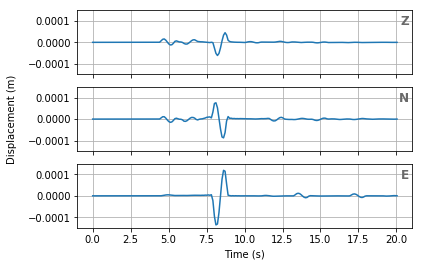

In [5]:
rec1 = calc.get_recording(src, rcv, mt)
rec1.plot(e_time=20)

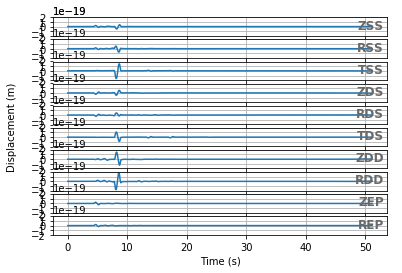

In [6]:
gf = calc.get_greens_function(src[-1], rcv[0], rcv[-1])
gf.plot()

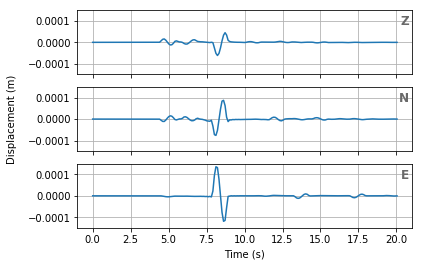

In [7]:
rec2 = gf.get_recording(0, mt, components='ZNE')
rec2.plot(e_time=20)

In [8]:
## There's still something wrong with azimuth